# Image Denoising Challenge

The goal for this challenge is to leverage your knowledge of Deep Learning to design and train a denoising model. For a given noisy image $X$, our model should learn to predict the denoised image $y$.


**Objectives**
- Visualize images
- Preprocess images for the neural network
- Fit a custom CNN for the task

## 1. Load Data

👉 Let's download the dataset archive.
It contains RGB and Black & White images we will be using for the rest of this challenge.

In [3]:
import glob

In [4]:
! curl https://wagon-public-datasets.s3.amazonaws.com/certification_france_2021_q2/paintings.zip > paintings.zip
! unzip -nq "paintings.zip" 
! rm "paintings.zip"
! ls -l

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 90.1M  100 90.1M    0     0  45.2M      0  0:00:01  0:00:01 --:--:-- 45.2M
total 48
-rw-r--r--     1 utilisateur  staff      0 Jun 29 09:17 README.md
-rw-r--r--     1 utilisateur  staff  20937 Jun 30 09:11 image_denoising.ipynb
drwx------  1087 utilisateur  staff  34784 Jun  9 15:06 paintings
drwxr-xr-x     3 utilisateur  staff     96 Jun 29 09:17 tests


In [5]:
dataset_paths = glob.glob("./paintings/*.jpg")
dataset_paths

['./paintings/Joan_Miro_48.jpg',
 './paintings/Titian_232.jpg',
 './paintings/Amedeo_Modigliani_30.jpg',
 './paintings/Frida_Kahlo_21.jpg',
 './paintings/Marc_Chagall_59.jpg',
 './paintings/Salvador_Dali_116.jpg',
 './paintings/Vincent_van_Gogh_363.jpg',
 './paintings/Paul_Klee_47.jpg',
 './paintings/Kazimir_Malevich_106.jpg',
 './paintings/Leonardo_da_Vinci_7.jpg',
 './paintings/Francisco_Goya_199.jpg',
 './paintings/Vincent_van_Gogh_161.jpg',
 './paintings/Paul_Klee_90.jpg',
 './paintings/Paul_Cezanne_24.jpg',
 './paintings/Peter_Paul_Rubens_42.jpg',
 './paintings/Amedeo_Modigliani_184.jpg',
 './paintings/Titian_52.jpg',
 './paintings/Alfred_Sisley_165.jpg',
 './paintings/Paul_Gauguin_72.jpg',
 './paintings/Vincent_van_Gogh_767.jpg',
 './paintings/Raphael_106.jpg',
 './paintings/Pablo_Picasso_78.jpg',
 './paintings/Diego_Rivera_10.jpg',
 './paintings/Pieter_Bruegel_108.jpg',
 './paintings/Hieronymus_Bosch_25.jpg',
 './paintings/Joan_Miro_6.jpg',
 './paintings/Kazimir_Malevich_79.jpg'

❓ **Display the image at index `53` of this dataset_paths (i.e the 54-th image)**

<details>
    <summary>Hint</summary>
    Use the <code>PIL.Image.open</code> and <code>matplotlib.pyplot.imshow</code> functions.
</details>

In [7]:
# YOUR CODE HERE
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

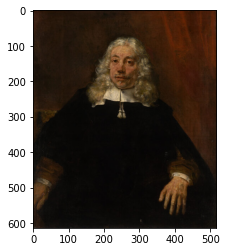

In [8]:
%matplotlib inline
pil_im = Image.open(dataset_paths[53], 'r')
imshow(np.asarray(pil_im))

❓ **What is the shape of the image you displayed above `img_shape`?  How many dimensions `img_dim` does it have ?**

In [14]:
# YOUR CODE HERE
img_shape = np.asarray(pil_im).shape
img_dim = 3

❓ **What was in the image above?**

In [16]:
img_shape = img_shape
img_dim = img_dim

# Uncomment the correct answer

is_portrait = True
#is_portrait = False

is_colored_image = True
#is_colored_image = False

In [17]:
from nbresult import ChallengeResult
result = ChallengeResult(
    'data_loading',
    img_shape=img_shape,
    img_dim=img_dim,
    is_portrait=is_portrait,
    is_colored_image=is_colored_image
)

result.write()

## 2. Processing

❓ **Store all images from the dataset folder in a list of numpy arrays called `dataset_images`**

- It can take a while
- If the dataset is too big to fit in memory, just take the first half (or quarter) of all pictures

In [28]:
# YOUR CODE HERE
dataset_images = []
for i in range(0,len(dataset_paths)):
    pil_im = Image.open(dataset_paths[i], 'r')
    dataset_images.append(np.asarray(pil_im))

### 2.1 Reshape, Resize, Rescale

Let's simplify our dataset and convert it to a single numpy array

❓ **First, check if that all the images in the dataset have the same number of dimensions**.
- What do you notice?
- How do you explain it? 

In [33]:
# YOUR CODE HERE
for i in range(0, len(dataset_images)):
    print(dataset_images[i].shape)

(358, 434, 3)
(627, 604, 3)
(484, 307, 3)
(484, 352, 3)
(461, 614, 3)
(480, 626, 3)
(614, 467, 3)
(401, 479, 3)
(600, 450, 3)
(425, 618, 3)
(639, 381, 3)
(614, 463, 3)
(362, 480, 3)
(322, 384, 3)
(474, 614, 3)
(484, 368, 3)
(556, 614, 3)
(427, 614, 3)
(489, 614, 3)
(419, 614, 3)
(614, 449, 3)
(653, 261, 3)
(480, 317, 3)
(614, 469, 3)
(234, 312, 3)
(270, 181, 3)
(360, 273, 3)
(424, 300)
(660, 520, 3)
(1229, 911)
(787, 510, 3)
(299, 218, 3)
(573, 561, 3)
(971, 1214, 3)
(526, 343, 3)
(1229, 833)
(586, 789, 3)
(360, 418, 3)
(742, 597, 3)
(614, 292, 3)
(466, 394, 3)
(482, 480, 3)
(461, 334, 3)
(614, 380, 3)
(1229, 757, 3)
(600, 398, 3)
(670, 900, 3)
(461, 326, 3)
(253, 173, 3)
(480, 346, 3)
(614, 457, 3)
(614, 422, 3)
(615, 427, 3)
(614, 517, 3)
(361, 480, 3)
(347, 540, 3)
(614, 489, 3)
(515, 768, 3)
(365, 480, 3)
(600, 535, 3)
(1010, 1536)
(629, 630, 3)
(842, 1229)
(960, 682, 3)
(801, 610, 3)
(445, 337, 3)
(484, 326, 3)
(365, 480, 3)
(284, 600, 3)
(614, 244, 3)
(288, 184, 3)
(575, 480, 3)


I notice that some pictures are only of dimensions 2 which means that they are in black and white

👉 We convert for you all black & white images into 3-colored ones by duplicating the image on three channels, so as to have only 3D arrays

In [36]:
from tqdm import tqdm

In [37]:
dataset_images = [x if x.ndim==3 else np.repeat(x[:,:,None], 3, axis=2) for x in tqdm(dataset_images)]
set([x.ndim for x in dataset_images])

100%|██████████| 1085/1085 [00:00<00:00, 1578.17it/s]


{3}

❓ **What about their shape now ?**
- Do they all have the same width/heights ? If not:
- Resize the images (120 pixels height and 100 pixels width) in the dataset, using `tensorflow.image.resize` function.
- Now that they all have the same shape, store them as a numpy array `dataset_resized`.
- This array should thus be of size $(n_{images}, 120, 100, 3)$

In [43]:
# YOUR CODE HERE
import tensorflow

In [103]:
dataset_r = []
for i in tqdm(dataset_images):
    dataset_r.append(tensorflow.image.resize(i[:], (120, 100)))

100%|██████████| 1085/1085 [00:00<00:00, 2358.64it/s]


In [104]:
dataset_resized = np.empty((1085,120,100,3))
for i in range(0,len(dataset_r)):
    dataset_resized[i] = dataset_r[i]

In [105]:
dataset_resized.shape

(1085, 120, 100, 3)

❓ **Rescale the data of each image between $0$ and $1$**
- Save your resulting list as `dataset_scaled`

In [106]:
# YOUR CODE HERE
dataset_scaled = dataset_resized/ 255. 

### 2.2 Create (X,y) sets

👉 Now, we'll add for you some **random noise** to our images to simulate noise (that our model will try to remove later)

In [109]:
NOISE_LEVEL = 0.2

dataset_noisy = np.clip(
    dataset_scaled + np.random.normal(
        loc=0,
        scale=NOISE_LEVEL,
        size=dataset_scaled.shape
    ).astype(np.float32),
    0,
    1
)
dataset_noisy.shape

(1085, 120, 100, 3)

❓ **Plot a noisy image below to visualize the noise and compare it with the normal one**

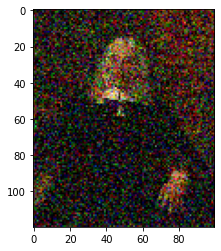

In [111]:
# YOUR CODE HERE
%matplotlib inline
imshow(dataset_noisy[53])

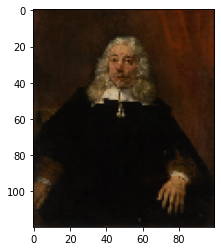

In [112]:
%matplotlib inline
imshow(dataset_scaled[53])

❓ **Create your `(X_train, Y_train)`, `(X_test, Y_test)` training set for your problem**

- Remember you are trying to use "noisy" pictures in order to predict the "normal" ones.
- Keeping about `20%` of randomly sampled data as test set

In [113]:
# YOUR CODE HERE
from sklearn.model_selection import train_test_split

In [114]:
X_train, X_test, Y_train, Y_test = train_test_split(dataset_noisy, dataset_scaled, test_size=0.2, random_state=42)

In [115]:
from nbresult import ChallengeResult
result = ChallengeResult(
    "preprocessing",
    X_train_shape = X_train.shape,
    Y_train_shape = Y_train.shape,
    X_std = X_train[:,:,:,0].std(),
    Y_std = Y_train[:,:,:,0].std(),
    first_image = Y_train[0]
)
result.write()

## 3. Convolutional Neural Network

A commonly used neural network architecture for image denoising is the __AutoEncoder__.

<img src='https://github.com/lewagon/data-images/blob/master/DL/autoencoder.png?raw=true'>

Its goal is to learn a compact representation of your data to reconstruct them as precisely as possible.  
The loss for such model must incentivize it to have __an output as close to the input as possible__.

For this challenge, __you will only be asked to code the Encoder part of the network__, since building a Decoder leverages layers architectures you are not familiar with (yet).

👉 Run this code below if you haven't managed to build your own (X,Y) training sets. This will load them as solution

```python
! curl https://wagon-public-datasets.s3.amazonaws.com/certification_france_2021_q2/data_painting_solution.pickle > data_painting_solution.pickle

import pickle
with open("data_painting_solution.pickle", "rb") as file:
    (X_train, Y_train, X_test, Y_test) = pickle.load(file)
    
! rm data_painting_solution.pickle
```

### 3.1 Architecture

👉 Run the cell below that defines the decoder

In [119]:
import tensorflow as tf
from tensorflow.keras import layers, losses, Sequential

In [120]:
# We choose to compress images into a latent_dimension of size 6000
latent_dimensions = 6000

# We build a decoder that takes 1D-vectors of size 6000 to reconstruct images of shape (120,100,3)
decoder = Sequential(name='decoder')
decoder.add(layers.Reshape((30, 25, 8), input_dim=latent_dimensions))
decoder.add(layers.Conv2DTranspose(filters=16, kernel_size=3, strides=2, padding="same", activation="relu"))
decoder.add(layers.Conv2DTranspose(filters=32, kernel_size=3, strides=2, padding="same", activation="relu"))
decoder.add(layers.Conv2D(filters=3, kernel_size=3, padding="same", activation="sigmoid"))
decoder.summary()

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 30, 25, 8)         0         
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 60, 50, 16)        1168      
_________________________________________________________________
conv2d_transpose_3 (Conv2DTr (None, 120, 100, 32)      4640      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 120, 100, 3)       867       
Total params: 6,675
Trainable params: 6,675
Non-trainable params: 0
_________________________________________________________________


❓ **Now, build the `encoder` that plugs correctly with the decoder defined above**. Make sure that:
- The output of your `encoder` is the same shape as the input of the `decoder`
- Use a convolutional neural network architecture without transfer learning
- Keep it simple
- Print model summary

In [126]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense

In [147]:
# CODE HERE YOUR ENCODER ARCHITECTURE AND PRINT IT'S MODEL SUMMARY

encoder = Sequential(name='encoder')
encoder.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(120, 100, 3)))
encoder.add(layers.MaxPooling2D((2, 2)))
encoder.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
encoder.add(layers.MaxPooling2D((2, 2)))
encoder.add(layers.Conv2D(128, (2, 2), activation='relu', padding='same'))
encoder.add(layers.Flatten())
encoder.add(layers.Dense(6000, activation='relu'))
encoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_47 (Conv2D)           (None, 120, 100, 32)      896       
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 60, 50, 32)        0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 60, 50, 64)        18496     
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 30, 25, 64)        0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 30, 25, 128)       32896     
_________________________________________________________________
flatten_16 (Flatten)         (None, 96000)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 6000)              5760

encoder.add(layers.Conv2DTranspose(filters=16, kernel_size=3, strides=2, padding="same", activation="relu"))
encoder.add(layers.Conv2DTranspose(filters=32, kernel_size=3, strides=2, padding="same", activation="relu"))
encoder.add(layers.Conv2D(filters=3, kernel_size=3, padding="same", activation="sigmoid"))

👉 **Test your encoder below**

In [148]:
# HERE WE BUILD THE AUTO-ENCODER (ENCODER + DECODER) FOR YOU. IT SHOULD PRINT A NICE SUMMARY
from tensorflow.keras.models import Model

x = layers.Input(shape=(120, 100, 3))
autoencoder = Model(x, decoder(encoder(x)), name="autoencoder")
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 120, 100, 3)]     0         
_________________________________________________________________
encoder (Sequential)         (None, 6000)              576058288 
_________________________________________________________________
decoder (Sequential)         (None, 120, 100, 3)       6675      
Total params: 576,064,963
Trainable params: 576,064,963
Non-trainable params: 0
_________________________________________________________________


### 3.2 Training

❓ **Before training the autoencoder, evaluate your baseline score**
- We will use the mean absolute error in this challenge
- Compute the baseline score on your test set in the "stupid" case where you don't manage to de-noise anything at all.
- Store the result under `score_baseline`

In [173]:
# YOUR CODE HERE
from sklearn.metrics import mean_absolute_error
y_true = Y_test.copy()
y_pred = X_test.copy()
y_true = y_true.reshape((len(y_true), np.prod(y_true.shape[1:])))
y_pred = y_pred.reshape((len(y_pred), np.prod(y_pred.shape[1:])))
score_baseline = mean_absolute_error(y_true, y_pred)
print(score_baseline)

0.1415676528088585


❓ Now, **train your autoencoder**

- Use an appropriate loss
- Adapt the learning rate of your optimizer if convergence is too slow/fast
- Make sure your model does not overfit with appropriate control techniques

💡 You will not be judged by the computing power of your computer, you can reach decent performance in less than 5 minutes of training without GPUs.

In [178]:
# YOUR CODE HERE
from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras import optimizers
adam_opt = optimizers.Adam()

autoencoder.compile(loss='mse', 
              optimizer=adam_opt,
              metrics=['mae'])

es = EarlyStopping(patience=5, verbose=2)

history = autoencoder.fit(X_train, Y_train, 
                    validation_split=0.3,
                    callbacks=[es], 
                    epochs=15, 
                    batch_size=64)

Epoch 1/15
10/10 [==============================] - 36s 4s/step - loss: 0.0219 - mae: 0.1116 - val_loss: 0.0241 - val_mae: 0.1164
Epoch 2/15
10/10 [==============================] - 30s 3s/step - loss: 0.0213 - mae: 0.1096 - val_loss: 0.0237 - val_mae: 0.1145
Epoch 3/15
10/10 [==============================] - 31s 3s/step - loss: 0.0210 - mae: 0.1085 - val_loss: 0.0236 - val_mae: 0.1139
Epoch 4/15
10/10 [==============================] - 41s 4s/step - loss: 0.0208 - mae: 0.1081 - val_loss: 0.0235 - val_mae: 0.1136
Epoch 5/15
10/10 [==============================] - 30s 3s/step - loss: 0.0206 - mae: 0.1074 - val_loss: 0.0234 - val_mae: 0.1134
Epoch 6/15
10/10 [==============================] - 32s 3s/step - loss: 0.0205 - mae: 0.1070 - val_loss: 0.0233 - val_mae: 0.1129
Epoch 7/15
10/10 [==============================] - 36s 4s/step - loss: 0.0204 - mae: 0.1066 - val_loss: 0.0232 - val_mae: 0.1125
Epoch 8/15
10/10 [==============================] - 35s 3s/step - loss: 0.0203 - mae: 0.10

❓ **Plot your training and validation loss at each epoch using the cell below**

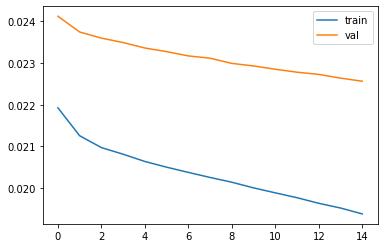

<Figure size 432x288 with 0 Axes>

In [179]:
# Plot below your train/val loss history
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()
# Run also this code to save figure as jpg in path below (it's your job to ensure it works)
fig = plt.gcf()
plt.savefig("tests/history.png")

❓ **Evaluate your performances on test set**
- Compute your de-noised test set `Y_pred` 
- Store your test score as `score_test`
- Plot a de-noised image from your test set and compare it with the original and noisy one using the cell below

In [184]:
# YOUR CODE HERE
Y_pred = autoencoder.predict(X_test)
score_test = autoencoder.evaluate(Y_pred, Y_test, verbose=0)[1]

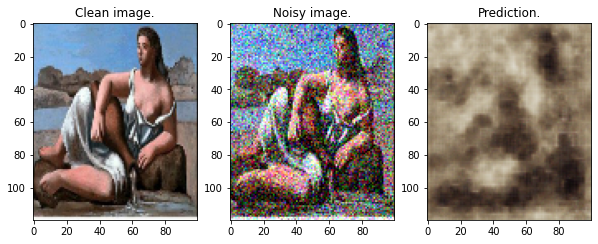

In [185]:
# RUN THIS CELL TO CHECK YOUR RESULTS
idx = 0

fig, axs = plt.subplots(1,3, figsize=(10,5))
axs[0].imshow(Y_test[idx])
axs[0].set_title("Clean image.")

axs[1].imshow(X_test[idx])
axs[1].set_title("Noisy image.")

axs[2].imshow(Y_pred[idx])
axs[2].set_title("Prediction.")

# Run this to save your results for correction
plt.savefig('tests/image_denoised.png')

In [186]:
score_test

0.11689533293247223

🧪 **Send your results below**

In [187]:
from nbresult import ChallengeResult

result = ChallengeResult(
    "network",
    input_shape = list(encoder.input.shape),
    output_shape = list(encoder.output.shape),
    layer_names = [layer.name for layer in encoder.layers],
    trainable_params = sum([tf.size(w_matrix).numpy() for w_matrix in encoder.trainable_variables]),
    score_baseline = score_baseline,
    score_test = score_test,
)
result.write()